<a href="https://colab.research.google.com/github/edarsh1/Detection_of_DoS_Attacks/blob/main/DS3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing Modules
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
from warnings import simplefilter
from sklearn.naive_bayes import GaussianNB
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.cluster import KMeans


In [ ]:
#Reading CSV file:
data = pd.read_csv("dataset_sdn.csv")
df = pd.DataFrame(data)

In [ ]:
#Representing the no. of rows and columns of the Dataframe
print(df.shape)
print(" ")
print(df.head())

(104345, 23)
 
      dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no   tx_bytes  \
0  1.010000e+11      3  ...      451         0       UDP        3  143928631   
1  2.810000e+11      2  ...      451         0       UDP        4       3842   
2  2.010000e+11      3  ...      451         0       UDP        1       3795   
3  2.010000e+11      3  ...      451         0       UDP        2       3688   
4  2.010000e+11      3  ...      451         0       UDP        3       3413   

  rx_bytes  tx_kbps  rx_kbps  tot_kbps  l

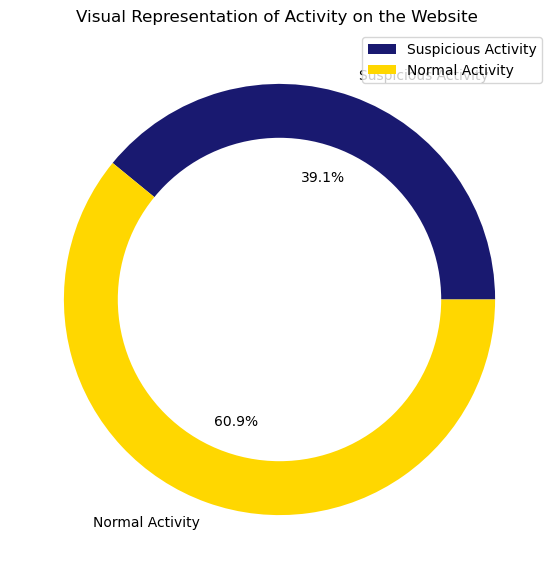

In [ ]:
#Visual Representation of Activity on the Website
labels = ['Suspicious Activity', 'Normal Activity']
sizes = [df.label.value_counts()[1], df.label.value_counts()[0]]

#According to the Data Source, label = 1 is Suspicious Activity and label = 0 is Non-Suspicious Activity

plt.figure(figsize = (12,7))
plt.pie(sizes, labels=labels, colors = ['midnightblue', 'gold'], autopct='%1.1f%%' )
centre_circle = plt.Circle((0, 0), 0.75, fc='white')
#Representing the Graph as Donut
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels)
plt.title('Visual Representation of Activity on the Website ')
plt.show()

Text(0.5, 1.0, 'Features which has NuLL values')

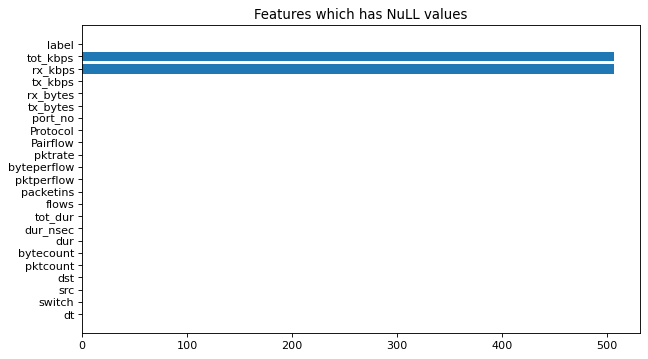

In [ ]:
#plotting Horizontal Bargraph for total no;of Nan values in each attribute
plt.figure(figsize=(9, 5), dpi=80)
plt.barh(df.columns, df.isna().sum())
plt.title("Features which has NuLL values")

Text(0.5, 1.0, 'Visual Representation of Activity from Various IP Addresses')

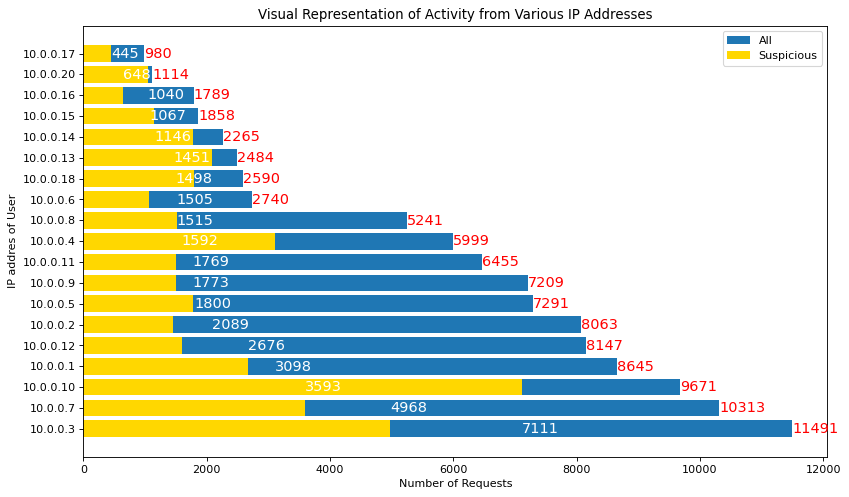

In [ ]:
#Visual Representation of Activity from Various IP Addresses

plt.figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(df.src.value_counts()).keys()), dict(df.src.value_counts()).values())

plt.barh(list(dict(df[df.label == 1].src.value_counts()).keys()), dict(df[df.label == 1].src.value_counts()).values(), color = 'gold')

# Represnting the Text Values:
for idx, val in enumerate(dict(df.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(df[df.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of User')
plt.legend(['All','Suspicious'])
plt.title('Visual Representation of Activity from Various IP Addresses')

Text(0.5, 1.0, 'The number of requests from different protocols')

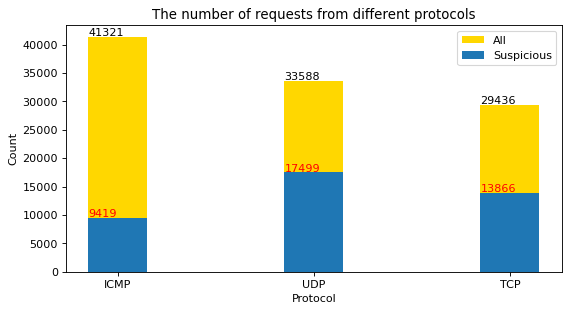

In [ ]:
#Plotting Bargraph for no of requests from different types of protocols:
plt.figure(figsize=(8, 4), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color = 'gold', width = 0.3)
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), width = 0.3)

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=10)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=10)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=10)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='r', size=10)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='r', size=10)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='r', size=10)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'Suspicious'])
plt.title('The number of requests from different protocols')

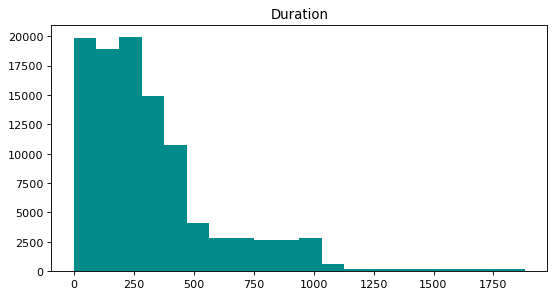

In [ ]:
#Plotting Graph for Duration
plt.figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color = 'darkcyan')
plt.title('Duration')
plt.show()

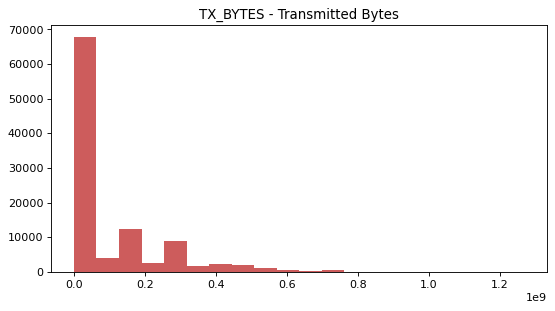

In [ ]:
plt.figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color = 'indianred')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

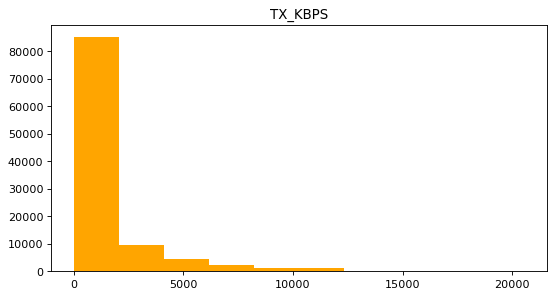

In [ ]:
plt.figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color = 'orange')
plt.title('TX_KBPS')
plt.show()

In [ ]:
#Describing Different Datatypes in Data and Counting Them

numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [ ]:
#Representing  the Object Data
object_df.head()

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


In [ ]:
# Dropping the Object Data and Nan Value rows:

df = df.drop(['src'], axis = 1)
df = df.drop(['dst'], axis = 1)
df = df.drop(['Protocol'], axis = 1)
df = df.dropna()

columns_ini = list(df.columns)
x = df.drop(['label'], axis = 1)
y = df['label']

#Normalising the Data
columns = list(x.columns)
scaled_data = preprocessing.normalize(x)
scaled_data = pd.DataFrame(x, columns = columns)
scaled_data.head()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,3,143928631,3917,0,0.0,0.0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,4,3842,3520,0,0.0,0.0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,3795,1242,0,0.0,0.0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3688,1492,0,0.0,0.0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,3,3413,3665,0,0.0,0.0


In [ ]:
#Splitting the Data into Train and Test Sets
warnings.filterwarnings("ignore",)
X_train,X_test,Y_train,Y_test = train_test_split(scaled_data, y, test_size = 0.3, random_state = 0)

#KNN Method

def KNN():
    neighbours = 10
    test_acc = []

    for i in range(1,neighbours):
        #Describing the KNN model
        knn = KNC(n_neighbors = i)
        knn.fit(X_train,Y_train)

        #Testing the model
        test_acc.append(knn.score(X_test, Y_test))

    #Plotting the accuracy for each value of neighbours
    plt.figure(figsize = (12,7), dpi = 80)
    plt.plot(range(1,neighbours), test_acc, label = 'Testing dataset Accuracy')

    plt.legend()
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.show()

    return('Maximum accuracy of KNN is ' +  str(max(test_acc)*100) + '%')


In [ ]:
#Naive Bayes Method

def NaiveBayes():
    gnb = GaussianNB()

    gnb.fit(X_train, Y_train)

    y_pred = gnb.predict(X_test)

    return('Accuracy of the Naive Bayes model is ' + str(accuracy_score(Y_test, y_pred)*100) + "%")


In [ ]:
#Support Logistic Regression Method

def LogReg():
    LR = LogisticRegression(random_state = 0, solver = 'newton-cg', max_iter = 5000)
    LR.fit(X_train, Y_train)



    Y_pred = LR.predict(X_test)

    return('Accuracy of the Logistic Regression is ' + str(accuracy_score(Y_test, Y_pred)*100) + "%")

In [ ]:
NaiveBayes()

'Accuracy of the Naive Bayes model is 63.17732408834104%'

In [ ]:
LogReg()

'Accuracy of the Logistic Regression is 74.9133281972265%'

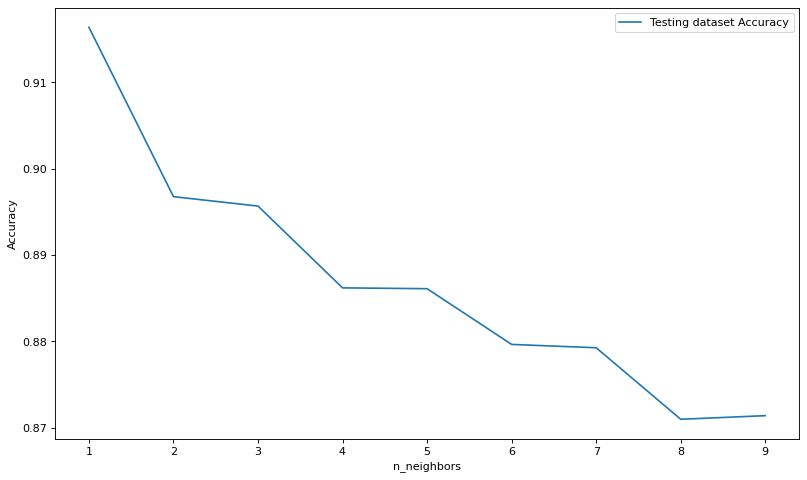

'Maximum accuracy of KNN is 91.63777606574217%'

In [ ]:
KNN()